In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

In [2]:
train=pd.read_csv("file:///C:/Users/Avinash/Downloads/competitive-data-science-predict-future-sales/sales_train.csv/sales_train_v2.csv",parse_dates=['date'])
i_c=pd.read_csv("file:///C:/Users/Avinash/Downloads/competitive-data-science-predict-future-sales/item_categories.csv")
item=pd.read_csv("file:///C:/Users/Avinash/Downloads/competitive-data-science-predict-future-sales/items.csv")
shops=pd.read_csv("file:///C:/Users/Avinash/Downloads/competitive-data-science-predict-future-sales/shops.csv")
test=pd.read_csv("file:///C:/Users/Avinash/Downloads/competitive-data-science-predict-future-sales/test.csv/test.csv").set_index('ID')

In [16]:
item.head(15)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [3]:
submission=pd.read_csv("file:///C:/Users/Avinash/Downloads/competitive-data-science-predict-future-sales/sample_submission.csv/sample_submission.csv").set_index('ID')

In [4]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [7]:
monthly_sales=train.groupby(["date_block_num","shop_id","item_id"])[
    "date","item_price","item_cnt_day"].agg({"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})

In [10]:
monthly_sales.head()

date            item_price item_cnt_day
                                      min        max       mean          sum
date_block_num shop_id item_id                                              
0              0       32      2013-01-21 2013-03-01      221.0          6.0
                       33      2013-01-17 2013-03-01      347.0          3.0
                       35      2013-01-31 2013-01-31      247.0          1.0
                       43      2013-01-31 2013-01-31      221.0          1.0
                       51      2013-01-13 2013-01-31      128.5          2.0

In [17]:
ts=train.groupby(["date_block_num"])["item_cnt_day"].sum()

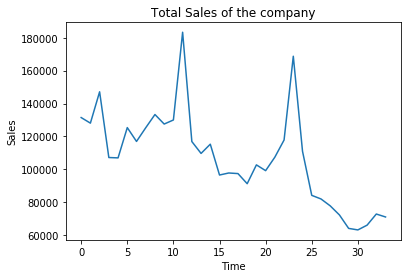

In [19]:
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)

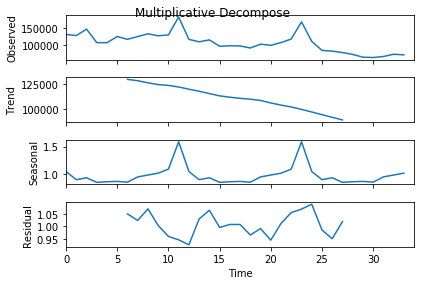

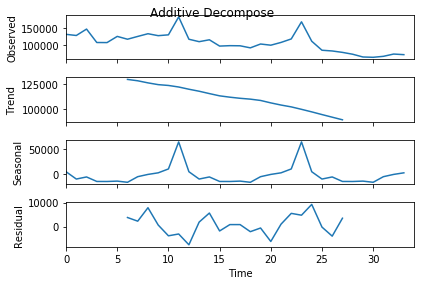

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(ts.values, model='multiplicative', freq=12)

result_add = seasonal_decompose(ts.values, model='additive', freq=12)
                                

result_mul.plot().suptitle('Multiplicative Decompose')
result_add.plot().suptitle('Additive Decompose')
plt.show()

In [53]:
result_add.trend

array([            nan,             nan,             nan,             nan,
                   nan,             nan, 129620.25      , 128245.95833333,
       126152.29166667, 124382.33333333, 123556.75      , 122009.58333333,
       119774.66666667, 117764.        , 115401.75      , 113141.625     ,
       111796.5       , 110681.875     , 109827.08333333, 108518.04166667,
       106069.20833333, 103902.04166667, 102059.375     ,  99608.95833333,
        97050.29166667,  94353.        ,  91727.70833333,  89113.91666667,
                   nan,             nan,             nan,             nan,
                   nan,             nan])

In [51]:
train_rec=pd.DataFrame()
train_rec['sec']=result_add.seasonal
train_rec['trd']=result_add.trend
train_rec['rsid']=result_add.resid
train_rec['obs']=result_add.observed

In [94]:

from statsmodels.tsa.stattools import adfuller, kpss

result = adfuller(ts1.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.086600973841083
p-value: 0.0010191123775715237
Critial Values:
   1%, -3.6461350877925254
Critial Values:
   5%, -2.954126991123355
Critial Values:
   10%, -2.6159676124885216


In [66]:
ts1=ts-train_rec['trd']

In [88]:
#ts.values

In [87]:
ts1=ts1.fillna(0)

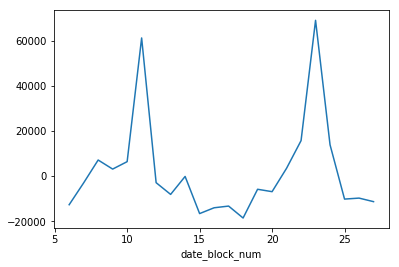

In [86]:
ts1.plot()

In [90]:
ts2=ts1/train_rec['sec']

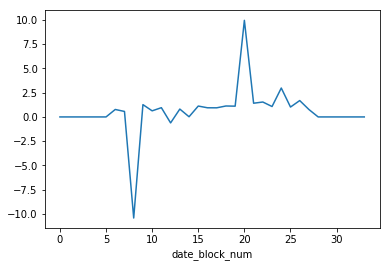

In [92]:
ts2.plot()

In [120]:
ts4=train.groupby(["date_block_num"])["item_cnt_day"].sum()
ts4.index=pd.date_range(start = '2013-01-01',end='2015-10-01',freq='MS')

In [128]:
ts4=ts4.reset_index()
ts4['item_cnt_day']

0     131479.0
1     128090.0
2     147142.0
3     107190.0
4     106970.0
5     125381.0
6     116966.0
7     125291.0
8     133332.0
9     127541.0
10    130009.0
11    183342.0
12    116899.0
13    109687.0
14    115297.0
15     96556.0
16     97790.0
17     97429.0
18     91280.0
19    102721.0
20     99208.0
21    107422.0
22    117845.0
23    168755.0
24    110971.0
25     84198.0
26     82014.0
27     77827.0
28     72295.0
29     64114.0
30     63187.0
31     66079.0
32     72843.0
33     71056.0
Name: item_cnt_day, dtype: float64

In [138]:
test['date_block_num'] = train['date_block_num'].max() + 1
x_test = test[['date_block_num', 'shop_id', 'item_id']].values

In [140]:
x_test.shape

(214200, 3)

In [160]:
from statsmodels.tsa.arima_model import ARIMA


model = ARIMA(ts.values, order=(1,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   34
Model:                     ARMA(1, 2)   Log Likelihood                -389.594
Method:                       css-mle   S.D. of innovations          21210.973
Date:                Thu, 30 May 2019   AIC                            789.188
Time:                        23:43:40   BIC                            796.820
Sample:                             0   HQIC                           791.791
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.494e+05        nan        nan        nan         nan         nan
ar.L1.y        0.9993        nan        nan        nan         nan         nan
ma.L1.y       -0.3648      0.178     -2.052      0.0

C:\Users\Avinash\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
C:\Users\Avinash\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Avinash\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\Avinash\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Avinash\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Avinash\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value

In [161]:
fc, se, conf = model_fit.forecast(15, alpha=0.05)

In [162]:
fc

array([70671.42125791, 70774.71541238, 70628.16518379, 70481.7125208 ,
       70335.35735845, 70189.09963183, 70042.93927608, 69896.87622637,
       69750.91041792, 69605.04178599, 69459.27026589, 69313.59579296,
       69168.01830259, 69022.53773023, 68877.15401134])

In [168]:
fc_series = pd.Series(fc)

In [169]:
fc_series

0     70671.421258
1     70774.715412
2     70628.165184
3     70481.712521
4     70335.357358
5     70189.099632
6     70042.939276
7     69896.876226
8     69750.910418
9     69605.041786
10    69459.270266
11    69313.595793
12    69168.018303
13    69022.537730
14    68877.154011
dtype: float64

In [182]:
gp = train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': ['sum']})

In [183]:
x = np.array(list(map(list, gp.index.values)))
y_train = gp.values

In [184]:
x[:,:1].shape

(1609124, 1)

In [185]:
test['date_block_num'] = train['date_block_num'].max() + 1
x_test = test[['date_block_num', 'shop_id', 'item_id']].values

In [187]:
oh1 = OneHotEncoder().fit(x[:,1].reshape(-1, 1))
x1 = oh1.transform(x[:,1].reshape(-1, 1))
x1_t = oh1.transform(x_test[:,1].reshape(-1, 1))

In [190]:
X_train = np.concatenate((x[:, :1], x1.toarray(), x[:, 2:]), axis=1)
X_test = np.concatenate((x_test[:, :1], x1_t.toarray(), x_test[:, 2:]), axis=1)

In [195]:
reg = LinearRegression().fit(X_train, y_train)
rfr = RandomForestRegressor().fit(X_train, y_train.ravel())

dmy = DummyRegressor().fit(X_train, y_train)

In [197]:
from sklearn.metrics import mean_squared_error
rmse_dmy = np.sqrt(mean_squared_error(y_train, dmy.predict(X_train)))
print('Dummy RMSE: %.4f' % rmse_dmy)
rmse_reg = np.sqrt(mean_squared_error(y_train, reg.predict(X_train)))
print('LR RMSE: %.4f' % rmse_reg)
rmse_rfr = np.sqrt(mean_squared_error(y_train, rfr.predict(X_train)))
print('RFR RMSE: %.4f' % rmse_rfr)

Dummy RMSE: 8.6499
LR RMSE: 8.6303
RFR RMSE: 2.0377


In [198]:
y_test = rfr.predict(X_test)

In [200]:
y_test.shape

(214200,)